In [1]:
import pandas as pd 

In [2]:
df=pd.read_excel('All collected data.xlsx')

In [3]:
df=df.drop(columns=['Reference'])

In [4]:
df.head()

,Density (Kg/m3),Time (hr),Surface temperature (oC),Fluid temperature (oC),Fluid velocity (m/s),Equivalent diameter (m),Dissolved oxygen (ppmw),Fouling factor (m2 K/kW)
0,797.762,3.333333,202.67,87.0,0.56,0.0147,322.100741,0.0023
1,797.762,3.666667,202.67,87.0,0.56,0.0147,322.100741,0.0020
2,797.762,4.000000,203.00,85.5,0.56,0.0147,322.100741,0.0120
3,797.762,4.333333,204.33,85.0,0.56,0.0147,322.100741,0.0149
4,797.762,4.666667,205.00,85.0,0.56,0.0147,322.100741,0.0171


In [5]:
X=df.drop(columns=['Fouling factor (m2 K/kW)'])

In [6]:
y=df['Fouling factor (m2 K/kW)']

In [7]:
import numpy as np

In [8]:
from sklearn.preprocessing import StandardScaler
stand=StandardScaler()
X=stand.fit_transform(X)

In [9]:
from sklearn.model_selection import train_test_split
tx,vx,ty,vy=train_test_split(X,y,test_size=0.2,random_state=666,shuffle=True)

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import BaggingRegressor
from xgboost import XGBRegressor as XGBR

In [33]:
df1=pd.DataFrame(columns=['yp'])

In [34]:
estimators = [
 ('rf', RandomForestRegressor(n_estimators=100,n_jobs=-1,random_state=666,oob_score=True)),
 ('bag', BaggingRegressor(n_estimators=10,oob_score=True,n_jobs=-1,random_state=666)),
 ('gbm',XGBR(n_estimators=100,gamma=0.6,n_jobs=-1,max_depth=6,learning_rate=0.01,subsample=1))
]

In [35]:
reg = StackingRegressor(estimators=estimators,final_estimator=LinearSVR(),cv=5)

In [36]:
reg.fit(tx, ty)
yp=reg.predict(vx)
df1['yp']=yp

D:\pyf\conda\lib\site-packages\sklearn\ensemble\_bagging.py:1204: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
D:\pyf\conda\lib\site-packages\sklearn\ensemble\_bagging.py:1204: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
D:\pyf\conda\lib\site-packages\sklearn\ensemble\_bagging.py:1204: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
D:\pyf\conda\lib\site-packages\sklearn\ensemble\_bagging.py:1204: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
D:\pyf\conda\lib\site-packages\sklearn\ensemble\_bagging.py:1204: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators we

In [37]:
m=[]
mae=[]
mse=[]
r2=[]
rae=[]
mape=[]
p25=[]
p05=[]
p75=[]
p2=[]
p4=[]
plog=[]
pexp=[]
psin=[]
ptan=[]

In [38]:
#df1.head()
df1.to_excel('./predict_data/stack.xlsx')

In [39]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_percentage_error
MAE=mean_absolute_error(vy,yp)
MSE=mean_squared_error(vy,yp)
R2=r2_score(vy,yp)
errors = np.abs(vy - yp)
mean_true = np.mean(vy)
RAE= np.mean(errors) / mean_true
MAPE= mean_absolute_percentage_error(vy,yp)
mae.append(MAE)
mse.append(MSE)
r2.append(R2)
rae.append(RAE)
mape.append(MAPE)

In [40]:
df2=pd.DataFrame({'MAE':mae,'MSE':mse,'R2':r2,'RAE':rae,'MAPE':mape})

In [41]:
df2

,MAE,MSE,R2,RAE,MAPE
0,0.004478,0.000137,0.996104,0.029252,0.149039


In [42]:
import matplotlib.pyplot as plt

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


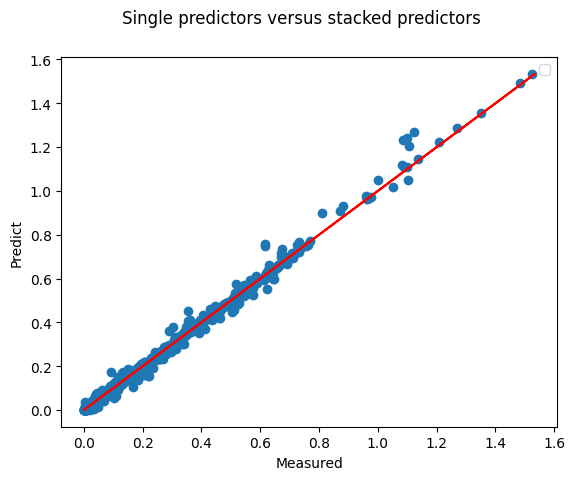

In [43]:
plt.plot(vy,vy,'r')
plt.scatter(yp,vy)
plt.xlabel('Measured')
plt.ylabel('Predict')
plt.suptitle('Single predictors versus stacked predictors')
plt.legend()
plt.show()